GD Start Point: [[-2.6457]
 [-6.3905]] [[896.98395368]]
Num steps: 257
Converged Point: [[1.23888291]
 [0.04402823]] [[-3.10897616]]


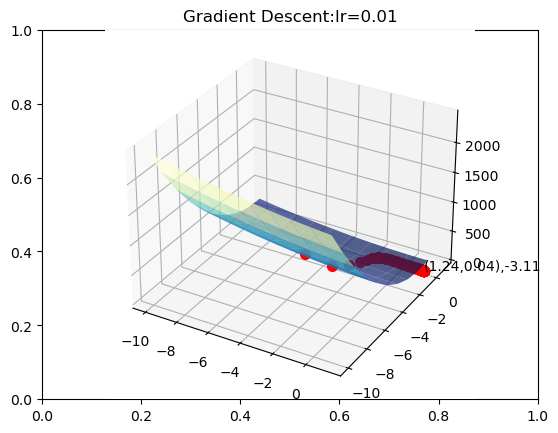

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random

##### To be Updated #####
student_id = "023xx04247"
#########################

student_id = ''.join([i for i in student_id if i.isdigit()])
random.seed(student_id)

# set the number of iterations and learning rate
iters = random.randint(100,300)
learning_rate = 0.01

# Evaluate the function at x
def C(x):
    ##### To be Updated #####
    return (x.T @ np.array([[2,1],[1,20]]) @ x) - (np.array([5,3]).reshape(2,1).T @ x)

# Evaluate the gradient of function at x
def dC(x):
    ##### To be Updated #####
    # 1. Compute and return the gradient
    return (np.array([[4, 1], [1, 40]]) @ x) - np.array([5, 3]).reshape(2, 1)
    #########################

def plot_grad_change(X,Y,Z, c, grad_xs0, grad_xs1, grad_ys):
    fig = plt.figure()
    title_str = "Gradient Descent:"+"lr="+str(learning_rate)
    plt.title(title_str)
    ax = fig.add_subplot(projection='3d')

    ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r,alpha=0.7)
    for i in range(len(grad_xs0)):
        ax.plot([grad_xs0[i]],[grad_xs1[i]], grad_ys[i][0], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
    ax.text(grad_xs0[-1],grad_xs1[-1],grad_ys[-1][0][0],
                 "("+str(round(grad_xs0[-1],2))+","+
                     str(round(grad_xs1[-1],2))+"),"+
                     str(round(grad_ys[-1][0][0],2)))
    plt.show()
    
def GD(start,x,y,z, c, dc, iters, eta):
    px = start.astype(float)
    py = c(px).astype(float)
    print("GD Start Point:",px,py)
    print("Num steps:",iters)
    grad_xs0, grad_xs1, grad_ys = [px[0][0]], [px[1][0]], [py]
    
    for iter in range(iters):
        ##### To be Updated #####
        # 2. Update px using gradient descent
        px = px - eta * dc(px)
        # 3. Update py
        py = c(px)
        #########################
        grad_xs0.append(px[0][0])
        grad_xs1.append(px[1][0])
        grad_ys.append(py)
    print("Converged Point:",px,py)
    plot_grad_change(x,y,z, c, grad_xs0,grad_xs1, grad_ys)

lo = -10
hi = 10
x1 = round(random.uniform(lo,0),4)
x2 = round(random.uniform(lo,0),4)
x = np.linspace(lo, 1, hi)
y = np.linspace(lo, 1, hi)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i][j] = C(np.array([[X[i][j]], [Y[i][j]]])).item()
# start Gradient Descent
GD(np.array([x1,x2]).reshape(2,1),X,Y,Z, C, dC, iters, learning_rate) 